# Importando as Bibliotecas

In [3]:
# import pandas
import pandas as pd
import seaborn as sn

In [4]:
import spacy

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
import re

# Conhecendo os dados

In [7]:
df = pd.read_csv(filepath_or_buffer="data/Dataset_5971.csv", sep=",", encoding="latin-1")

In [8]:
display(df)

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No
...,...,...,...,...,...
5966,ham,:( but your not here....,No,No,No
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,No,No,No
5968,ham,Its a valentine game. . . send dis msg to all ...,No,No,No
5969,ham,We r outside already.,No,No,No


In [9]:
df.dtypes

LABEL    object
TEXT     object
URL      object
EMAIL    object
PHONE    object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [11]:
df.describe()

,LABEL,TEXT,URL,EMAIL,PHONE
count,5971,5971,5971,5971,5971
unique,5,5949,2,2,2
top,ham,The greatest test of courage on earth is to be...,No,No,No
freq,4844,2,5764,5952,5127


In [12]:
df["LABEL"].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [13]:
df["URL"].unique()

array(['No', 'yes'], dtype=object)

In [14]:
df["EMAIL"].unique()

array(['No', 'yes'], dtype=object)

In [15]:
df["PHONE"].unique()

array(['No', 'yes'], dtype=object)

In [16]:
len([x for x in df.duplicated() if x == True])

17

In [17]:
i = 0
index_dup = []
for x in df.duplicated():
    if x == True:
        index_dup.append(i)
    i += 1

In [18]:
df.iloc[index_dup]

,LABEL,TEXT,URL,EMAIL,PHONE
1352,Smishing,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...,No,No,yes
1804,Smishing,Someone U know has asked our dating service 2 ...,No,No,yes
2963,ham,He remains a bro amongst bros,No,No,No
3692,ham,Reverse is cheating. That is not mathematics.,No,No,No
3874,ham,The sign of maturity is not when we start sayi...,No,No,No
3908,Smishing,U have a secret admirer. REVEAL who thinks U R...,No,No,yes
3909,Smishing,Congrats! 2 mobile 3G Videophones R yours. cal...,No,No,yes
4142,ham,The greatest test of courage on earth is to be...,No,No,No
4731,ham,"Sorry,in meeting I'll call later",No,No,No
4927,Smishing,URGENT!! Your 4* Costa Del Sol Holiday or Â£50...,No,No,yes


In [19]:
df[df["TEXT"] == "Sorry,in meeting I'll call later"]

,LABEL,TEXT,URL,EMAIL,PHONE
417,ham,"Sorry,in meeting I'll call later",No,No,No
4731,ham,"Sorry,in meeting I'll call later",No,No,No


In [20]:
df[df["TEXT"] == "Arun can u transfr me d amt"]

,LABEL,TEXT,URL,EMAIL,PHONE
415,ham,Arun can u transfr me d amt,No,No,No
5343,ham,Arun can u transfr me d amt,No,No,No


# Transformando os dados

In [21]:
df_transformado = df.copy()

In [22]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5971 entries, 0 to 5970
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   5971 non-null   object
 1   TEXT    5971 non-null   object
 2   URL     5971 non-null   object
 3   EMAIL   5971 non-null   object
 4   PHONE   5971 non-null   object
dtypes: object(5)
memory usage: 233.4+ KB


In [23]:
df_transformado["LABEL"].unique()

array(['ham', 'Smishing', 'spam', 'Spam', 'smishing'], dtype=object)

In [24]:
df_transformado["LABEL"].replace("Spam", "spam", inplace=True)
df_transformado["LABEL"].replace("Smishing", "smishing", inplace=True)
df_transformado["LABEL"].replace(["ham", "spam", "smishing"], [-1, 0, 1], inplace=True)

In [25]:
df_transformado["URL"].replace(["No", "yes"], [0, 1], inplace=True)
df_transformado["EMAIL"].replace(["No", "yes"], [0, 1], inplace=True)
df_transformado["PHONE"].replace(["No", "yes"], [0, 1], inplace=True)

In [26]:
display(df_transformado["URL"].unique())
display(df_transformado["EMAIL"].unique())
display(df_transformado["PHONE"].unique())

array([0, 1])

array([0, 1])

array([0, 1])

In [27]:
len([x for x in df_transformado.duplicated() if x == True]) ## Ele aumenta por causa do tratamento que se fez para as palvras minusculas

19

In [28]:
df_transformado.drop_duplicates(inplace=True)

In [29]:
display(len(df_transformado))
display(len(df))

display(len(df) - len(df_transformado))

5952

5971

19

In [30]:
df_transformado.reset_index(drop=True, inplace=True)

In [31]:
display(df.head())
display(df_transformado.head())

,LABEL,TEXT,URL,EMAIL,PHONE
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,No,No,No
1,ham,What's up? Do you want me to come online? If y...,No,No,No
2,ham,So u workin overtime nigpun?,No,No,No
3,ham,"Also sir, i sent you an email about how to log...",No,No,No
4,Smishing,Please Stay At Home. To encourage the notion o...,No,No,No


,LABEL,TEXT,URL,EMAIL,PHONE
0,-1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0
1,-1,What's up? Do you want me to come online? If y...,0,0,0
2,-1,So u workin overtime nigpun?,0,0,0
3,-1,"Also sir, i sent you an email about how to log...",0,0,0
4,1,Please Stay At Home. To encourage the notion o...,0,0,0


# Analisando os dados

<Axes: xlabel='LABEL', ylabel='count'>

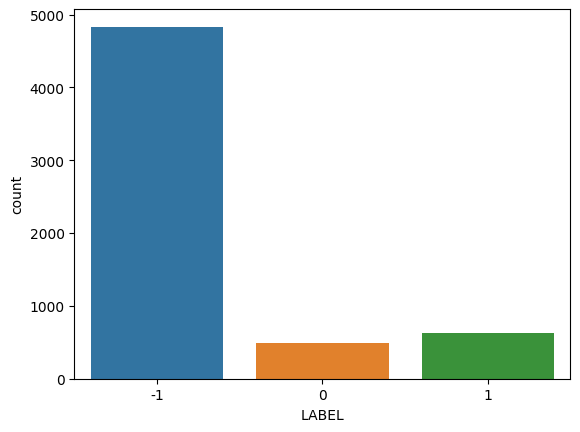

In [32]:
sn.countplot(df_transformado, x="LABEL")

In [33]:
display(len(df_transformado[df_transformado["LABEL"] == -1]))
display(len(df_transformado[df_transformado["LABEL"] == 0]))
display(len(df_transformado[df_transformado["LABEL"] == 1]))

4834

489

629

# NLP

#### 1500 para treino e o resto para validação

In [34]:
nlp = spacy.load("en_core_web_trf")

/home/daniel/Documents/tcc/modelo_de_machine_learning/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
df_teste = df_transformado.iloc[:1500].copy()
df_validacao = df_transformado.iloc[1500:].copy()

In [36]:
display(df_teste)
display(df_validacao)

,LABEL,TEXT,URL,EMAIL,PHONE
0,-1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0
1,-1,What's up? Do you want me to come online? If y...,0,0,0
2,-1,So u workin overtime nigpun?,0,0,0
3,-1,"Also sir, i sent you an email about how to log...",0,0,0
4,1,Please Stay At Home. To encourage the notion o...,0,0,0
...,...,...,...,...,...
1495,0,EASTENDERS TV Quiz. What FLOWER does DOT compa...,0,0,1
1496,-1,"Ya, i'm referin to mei's ex wat... No ah, wait...",0,0,0
1497,-1,"Bloody hell, cant believe you forgot my surnam...",0,0,0
1498,-1,Don no da:)whats you plan? Let mw knowï¿½,0,0,0


,LABEL,TEXT,URL,EMAIL,PHONE
1500,-1,I gotta collect da car at 6 lei.,0,0,0
1501,-1,Hey... Thk we juz go accordin to wat we discus...,0,0,0
1502,-1,Ya it came a while ago,0,0,0
1503,-1,Appt is at &lt;TIME&gt; am. Not my fault u don...,0,0,0
1504,-1,For many things its an antibiotic and it can b...,0,0,0
...,...,...,...,...,...
5947,-1,I'm in class. Did you get my text.,0,0,0
5948,-1,:( but your not here....,0,0,0
5949,-1,Becoz its &lt;#&gt; jan whn al the post ofic...,0,0,0
5950,-1,Its a valentine game. . . send dis msg to all ...,0,0,0


In [61]:
def remover_caractere_especial(text):
    texto_sem_cs = re.sub("ï¿½", "", text)
    return texto_sem_cs

In [62]:
def lemmatizar(text):
    doc = nlp(text)
    frases_lematizadas = " ".join([token.lemma_ for token in doc])
    print(frases_lematizadas)
    return frases_lematizadas

In [63]:
def pre_processamento(text):
    texto_processado = text
    texto_processado = remover_caractere_especial(texto_processado)
    texto_processado = lemmatizar(texto_processado)
    return texto_processado

In [64]:
df_teste["PROCESSED_TEXT"] = df_teste["TEXT"].apply(pre_processamento)

your opinion about I ? 1 . over 2 . Jada 3 . Kusruthi 4 . lovable 5 . silent 6 . spl character 7 . not matured 8 . stylish 9 . simple pl reply ..
what be up ? do you want I to come online ? if you be free we can talk sometime
so u workin overtime nigpun ?
also sir , I send you an email about how to log into the usc payment portal . i.ll send you another message that should explain how thing be back home . have a great weekend .
please stay at home . to encourage the notion of stay at home . all tax - pay citizen be entitle to 305.96 or more emergency refund . smsg.io/fcvbd
BankOfAmerica alert 137943 . please follow http://bit.do/cgjk-and re - activate
sorry dude . do nt know how I forget . even after Dan remind I . sorry . hope you guy have fun .
I do n't quite know what to do . I still ca n't get hold of anyone . I cud pick you up bout 7.30pm and we can see if they be in the pub ?
ok lor . anyway I thk we ca nt get ticket now cos like quite late already . u wan 2 go look 4 ur fren a n

In [66]:
df_teste.head(20)

,LABEL,TEXT,URL,EMAIL,PHONE,PROCESSED_TEXT
0,-1,Your opinion about me? 1. Over 2. Jada 3. Kusr...,0,0,0,your opinion about I ? 1 . over 2 . Jada 3 . K...
1,-1,What's up? Do you want me to come online? If y...,0,0,0,what be up ? do you want I to come online ? if...
2,-1,So u workin overtime nigpun?,0,0,0,so u workin overtime nigpun ?
3,-1,"Also sir, i sent you an email about how to log...",0,0,0,"also sir , I send you an email about how to lo..."
4,1,Please Stay At Home. To encourage the notion o...,0,0,0,please stay at home . to encourage the notion ...
5,1,BankOfAmerica Alert 137943. Please follow http...,1,0,1,BankOfAmerica alert 137943 . please follow htt...
6,-1,Sorry dude. Dont know how i forgot. Even after...,0,0,0,sorry dude . do nt know how I forget . even af...
7,-1,I don't quite know what to do. I still can't g...,0,0,0,I do n't quite know what to do . I still ca n'...
8,-1,Ok lor. Anyway i thk we cant get tickets now c...,0,0,0,ok lor . anyway I thk we ca nt get ticket now ...
9,-1,Wat r u doing now?,0,0,0,wat r u do now ?


In [69]:
# TODO: Melhorar alguns lemmas, colocar stemm, retirar os caracteres especiais
display(df_teste["PROCESSED_TEXT"].iloc[1])
display(df_teste["TEXT"].iloc[1])

'what be up ? do you want I to come online ? if you be free we can talk sometime'

"What's up? Do you want me to come online? If you are free we can talk sometimeï¿½"

In [70]:
x = df_teste["PROCESSED_TEXT"]
y = df_teste["LABEL"]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [72]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [73]:
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(x_test_tfidf)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.92
